In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
! kaggle datasets download -d masoudnickparvar/brain-tumor-mri-dataset --unzip

Dataset URL: https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset
License(s): CC0-1.0
 98% 145M/149M [00:00<00:00, 268MB/s]
100% 149M/149M [00:00<00:00, 247MB/s]


In [ ]:
def get_class_paths(path):
  classes = []
  class_paths = []

  for label in os.listdir(path):
    label_path = os.path.join(path, label)

    if os.path.isdir(label_path):
      for image in os.listdir(label_path):
        image_path = os.path.join(label_path, image)
        classes.append(label)
        class_paths.append(image_path)

  df = pd.DataFrame({
  'Class Path' : class_paths,
  'Class' : classes
  })

  return df

In [ ]:
tr_df = get_class_paths("/content/Training")

In [ ]:
tr_df

Class Path      Class
0     /content/Training/pituitary/Tr-pi_0140.jpg  pituitary
1     /content/Training/pituitary/Tr-pi_0514.jpg  pituitary
2     /content/Training/pituitary/Tr-pi_0311.jpg  pituitary
3     /content/Training/pituitary/Tr-pi_1174.jpg  pituitary
4     /content/Training/pituitary/Tr-pi_0594.jpg  pituitary
...                                          ...        ...
5707     /content/Training/glioma/Tr-gl_0436.jpg     glioma
5708     /content/Training/glioma/Tr-gl_0859.jpg     glioma
5709     /content/Training/glioma/Tr-gl_0753.jpg     glioma
5710     /content/Training/glioma/Tr-gl_0733.jpg     glioma
5711     /content/Training/glioma/Tr-gl_0194.jpg     glioma

[5712 rows x 2 columns]

In [ ]:
ts_df = get_class_paths("/content/Testing")

In [ ]:
ts_df

Class Path      Class
0     /content/Testing/pituitary/Te-pi_0064.jpg  pituitary
1     /content/Testing/pituitary/Te-pi_0132.jpg  pituitary
2     /content/Testing/pituitary/Te-pi_0059.jpg  pituitary
3     /content/Testing/pituitary/Te-pi_0099.jpg  pituitary
4     /content/Testing/pituitary/Te-pi_0040.jpg  pituitary
...                                         ...        ...
1306     /content/Testing/glioma/Te-gl_0169.jpg     glioma
1307     /content/Testing/glioma/Te-gl_0271.jpg     glioma
1308     /content/Testing/glioma/Te-gl_0206.jpg     glioma
1309     /content/Testing/glioma/Te-gl_0085.jpg     glioma
1310     /content/Testing/glioma/Te-gl_0130.jpg     glioma

[1311 rows x 2 columns]

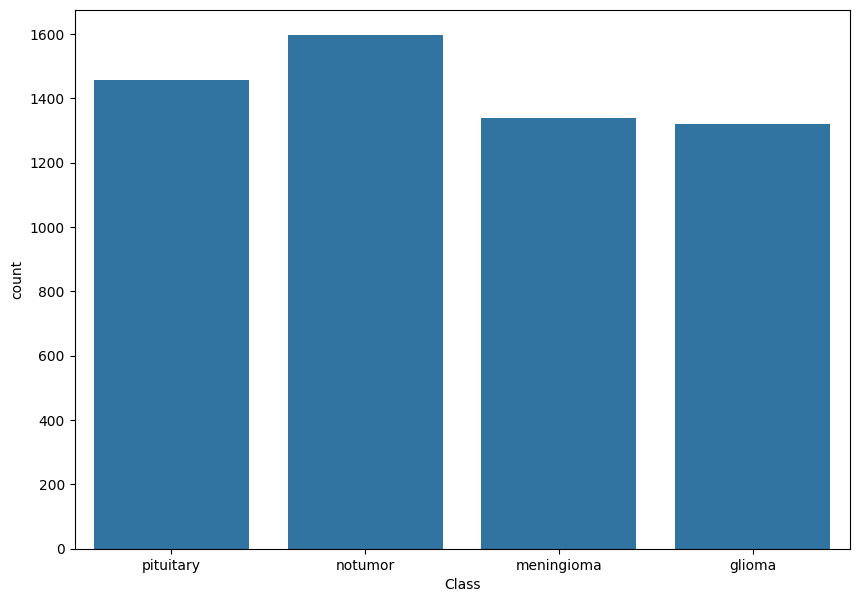

In [ ]:
plt.figure(figsize=(10, 7))
ax = sns.countplot(data=tr_df, x=tr_df['Class'])

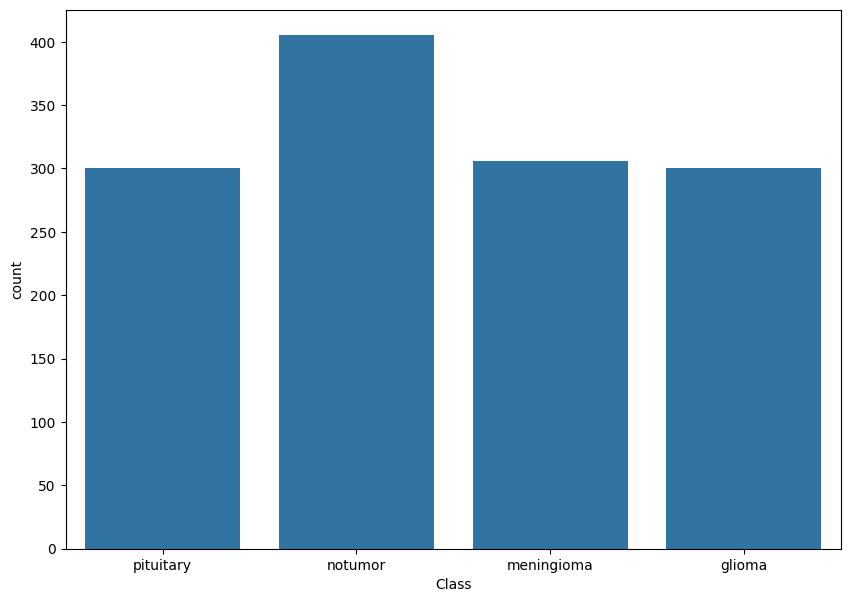

In [ ]:
plt.figure(figsize=(10, 7))
ax = sns.countplot(data=ts_df, x=ts_df['Class'])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
valid_df, ts_df = train_test_split(ts_df, train_size=0.5, stratify=ts_df['Class'])

In [ ]:
valid_df

Class Path       Class
745   /content/Testing/meningioma/Te-me_0191.jpg  meningioma
739   /content/Testing/meningioma/Te-me_0266.jpg  meningioma
86     /content/Testing/pituitary/Te-pi_0049.jpg   pituitary
180    /content/Testing/pituitary/Te-pi_0231.jpg   pituitary
790   /content/Testing/meningioma/Te-me_0236.jpg  meningioma
...                                          ...         ...
768   /content/Testing/meningioma/Te-me_0213.jpg  meningioma
198    /content/Testing/pituitary/Te-pi_0093.jpg   pituitary
1115      /content/Testing/glioma/Te-gl_0160.jpg      glioma
932   /content/Testing/meningioma/Te-me_0129.jpg  meningioma
1152      /content/Testing/glioma/Te-gl_0116.jpg      glioma

[655 rows x 2 columns]

In [ ]:
ts_df

Class Path       Class
1014      /content/Testing/glioma/Te-gl_0166.jpg      glioma
77     /content/Testing/pituitary/Te-pi_0051.jpg   pituitary
725   /content/Testing/meningioma/Te-me_0232.jpg  meningioma
994   /content/Testing/meningioma/Te-me_0290.jpg  meningioma
403      /content/Testing/notumor/Te-no_0145.jpg     notumor
...                                          ...         ...
861   /content/Testing/meningioma/Te-me_0038.jpg  meningioma
462      /content/Testing/notumor/Te-no_0286.jpg     notumor
149    /content/Testing/pituitary/Te-pi_0135.jpg   pituitary
345      /content/Testing/notumor/Te-no_0262.jpg     notumor
1277      /content/Testing/glioma/Te-gl_0125.jpg      glioma

[656 rows x 2 columns]

In [ ]:
batch_size = 32

img_size = (299, 299)

image_generator = ImageDataGenerator(rescale=1/255, brightness_range=(0.8, 1.2))

ts_gen = ImageDataGenerator(rescale=1/255)

In [ ]:
tr_gen = image_generator.flow_from_dataframe(dataframe=tr_df, x_col='Class Path',
    y_col='Class',
    batch_size=batch_size,
    target_size=img_size
)

valid_gen = image_generator.flow_from_dataframe(dataframe=valid_df, x_col='Class Path',
    y_col='Class',
    batch_size=batch_size,
    target_size=img_size
)

ts_gen = ts_gen.flow_from_dataframe(dataframe=ts_df, x_col='Class Path',
    y_col='Class',
    batch_size=16,
    target_size=img_size,
    shuffle = False
)

Found 5712 validated image filenames belonging to 4 classes.
Found 655 validated image filenames belonging to 4 classes.
Found 656 validated image filenames belonging to 4 classes.


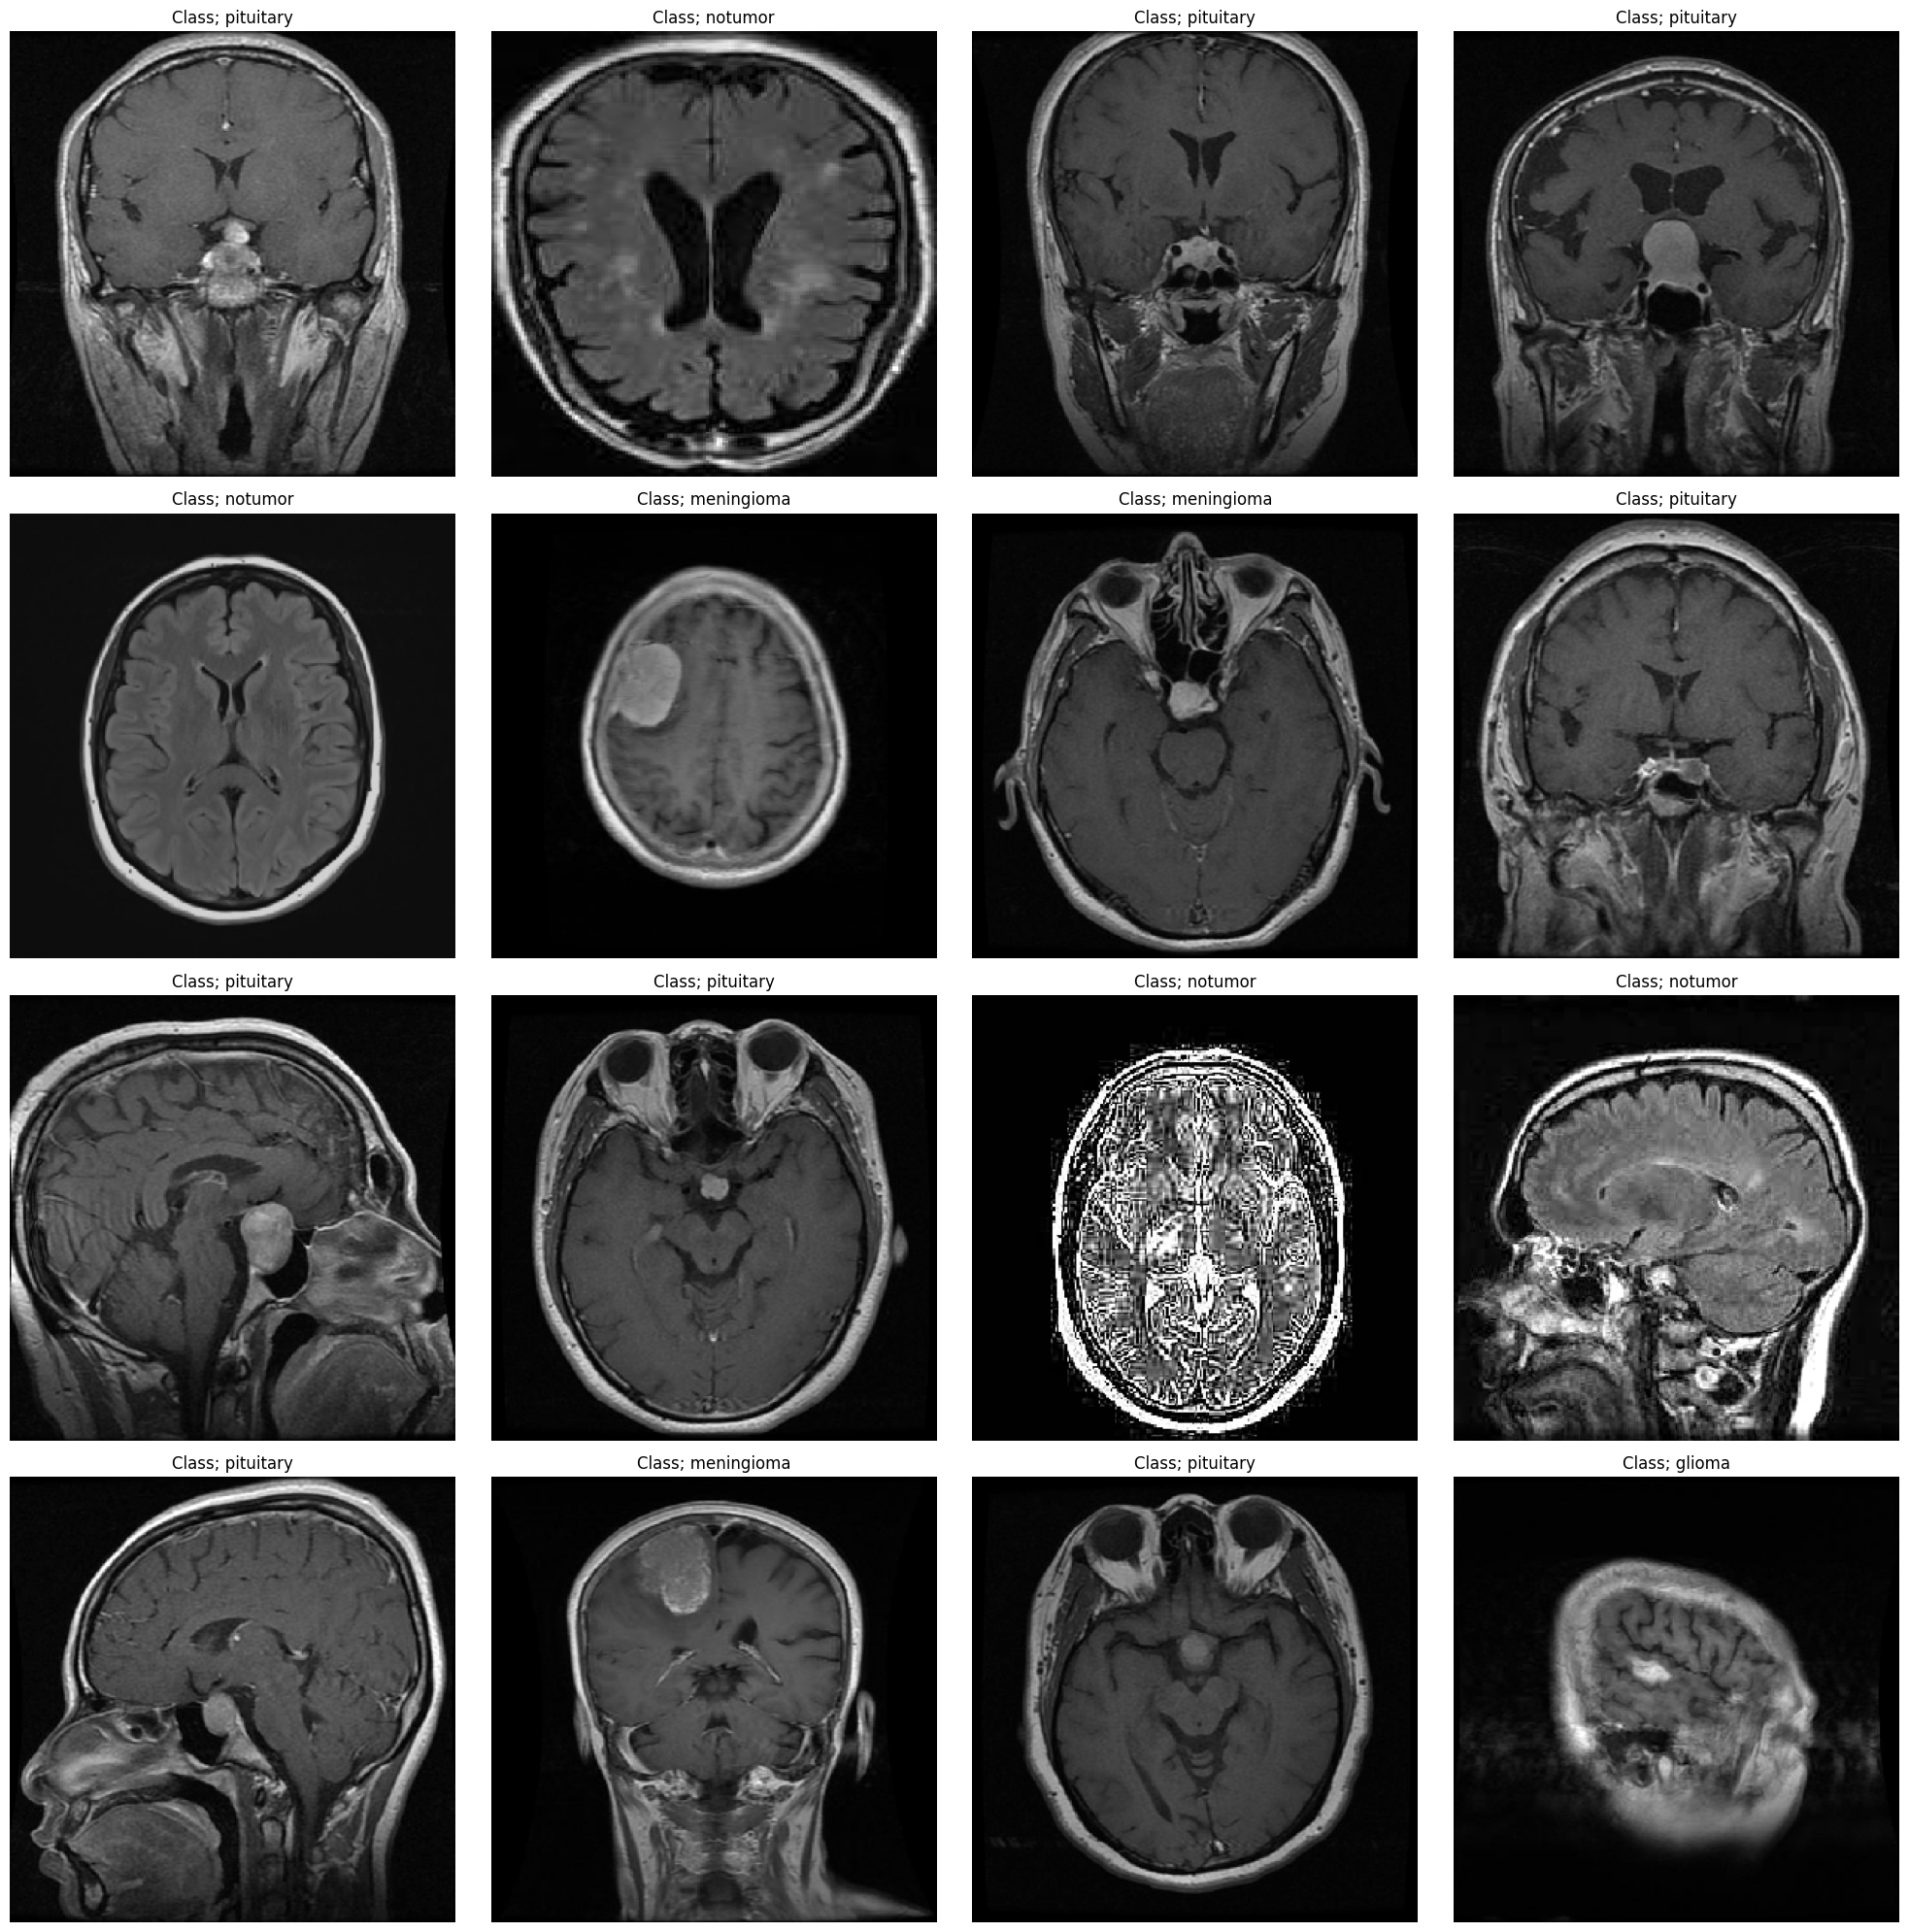

In [ ]:
plt.figure(figsize=(20, 20))
for i in range(16):
  plt.subplot(4, 4, i+1)
  batch = next(tr_gen)
  image = batch[0][0]
  label = batch [1][0]
  plt.imshow(image)

  class_index = np.argmax(label)

  class_name = list(tr_gen.class_indices.keys())
  class_indices = list(tr_gen.class_indices.values())

  index_position = class_indices.index(class_index)

  class_name = class_name[index_position]

  plt.title(f"Class; {class_name}")
  plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
image_shape = (299, 299, 3)

base_model = tf.keras.applications.Xception(include_top=False, weights="imagenet", input_shape=image_shape, pooling='max')

model = Sequential([
    base_model,
    Flatten(),
    Dropout(rate = 0.3),
    Dense(128, activation='relu'),
    Dropout(rate = 0.25),
    Dense(4, activation='softmax')
])

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
model.compile(Adamax(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=[
                  'accuracy',
                  Precision(),
                  Recall()
              ])

In [ ]:
hist = model.fit(tr_gen, epochs=10, validation_data=valid_gen)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


179/179 ━━━━━━━━━━━━━━━━━━━━ 265s 1s/step - accuracy: 0.8042 - loss: 0.5845 - precision: 0.8494 - recall: 0.7227 - val_accuracy: 0.9725 - val_loss: 0.1002 - val_precision: 0.9739 - val_recall: 0.9695
Epoch 2/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 141s 780ms/step - accuracy: 0.9751 - loss: 0.0799 - precision: 0.9770 - recall: 0.9736 - val_accuracy: 0.9756 - val_loss: 0.0806 - val_precision: 0.9769 - val_recall: 0.9695
Epoch 3/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 144s 793ms/step - accuracy: 0.9886 - loss: 0.0343 - precision: 0.9891 - recall: 0.9882 - val_accuracy: 0.9740 - val_loss: 0.0622 - val_precision: 0.9755 - val_recall: 0.9740
Epoch 4/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 143s 794ms/step - accuracy: 0.9924 - loss: 0.0289 - precision: 0.9925 - recall: 0.9921 - val_accuracy: 0.9908 - val_loss: 0.0212 - val_precision: 0.9908 - val_recall: 0.9908
Epoch 5/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 143s 794ms/step - accuracy: 0.9938 - loss: 0.0168 - precision: 0.9938 - recall: 0.9938 - val_accuracy: 0.9969 - val_lo

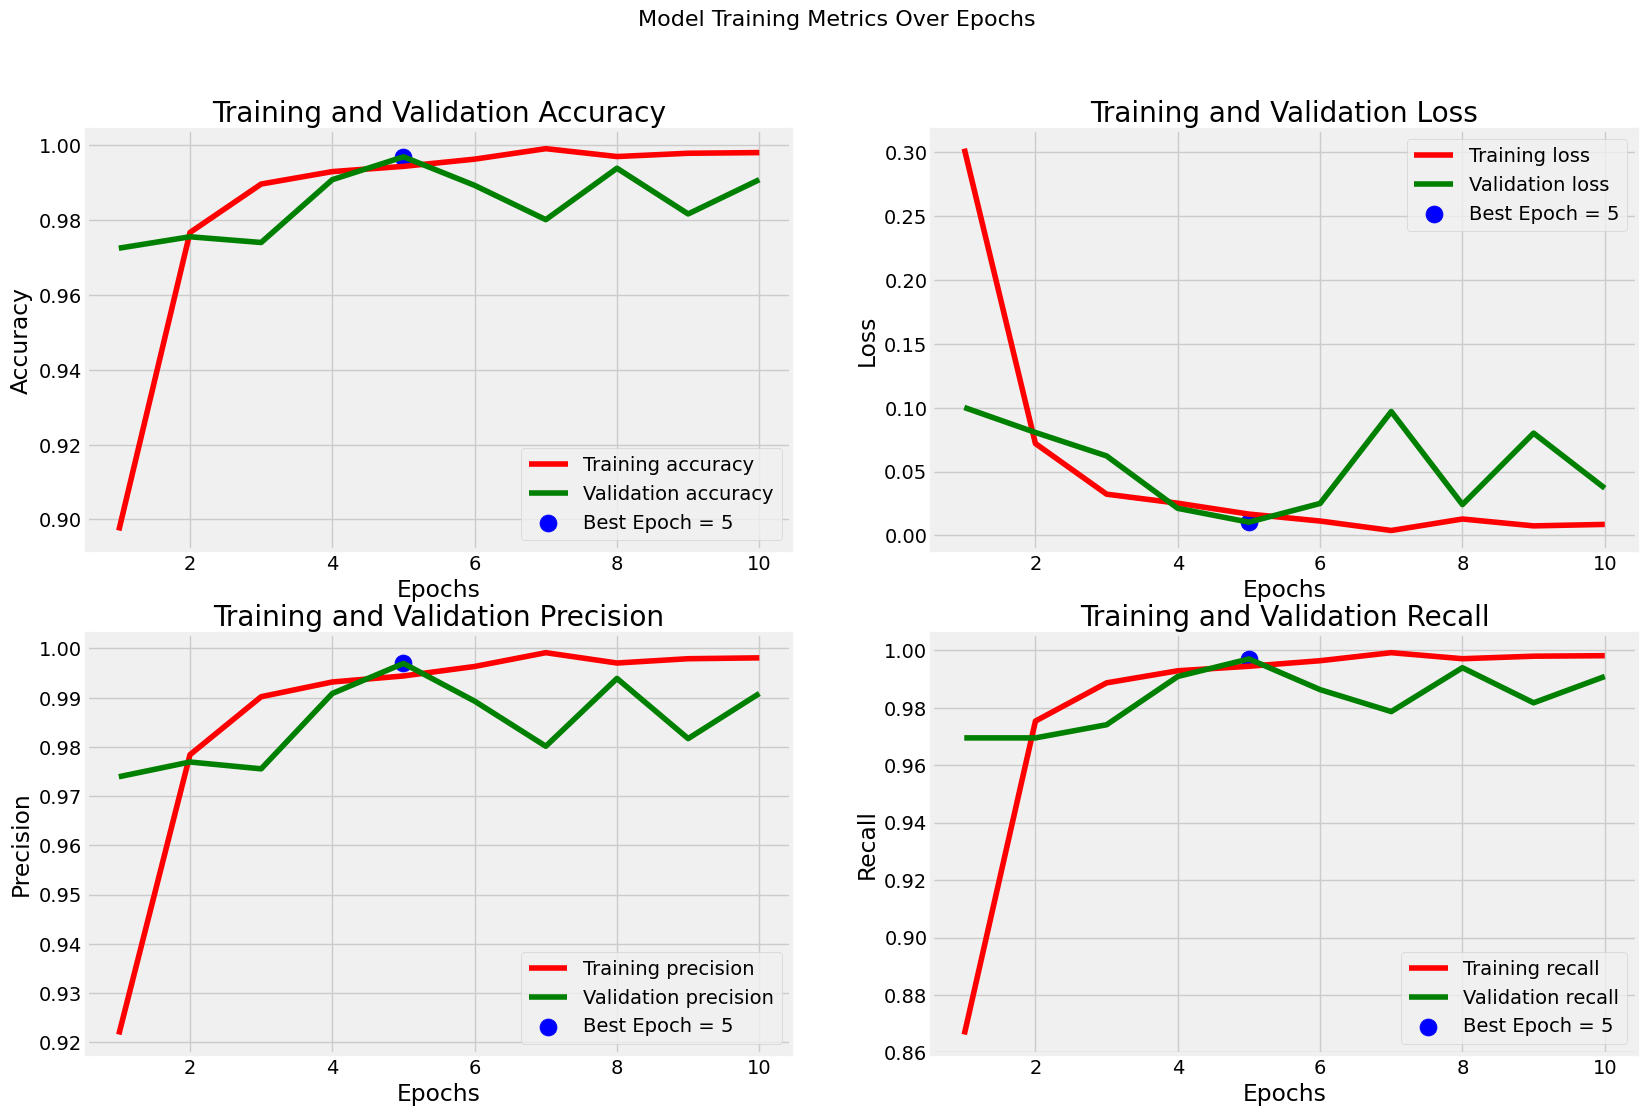

In [ ]:
metrics = ['accuracy', 'loss', 'precision', 'recall']
tr_metrics = {m:hist.history[m] for m in metrics}
val_metrics = {m:hist.history[f'val_{m}'] for m in metrics}

best_epoch = {}
best_values = {}

for m in metrics:
    if m == 'loss':
        idx = np.argmin(val_metrics[m])
    else:
        idx = np.argmax(val_metrics[m])

    best_epoch[m] = idx + 1
    best_values[m] = val_metrics[m][idx]

plt.figure(figsize=(20, 12))
plt.style.use('fivethirtyeight')

for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 2, i)
    epochs = range(1, len(tr_metrics[metric]) + 1)

    plt.plot(epochs, tr_metrics[metric], 'r', label=f'Training {metric}')
    plt.plot(epochs, val_metrics[metric], 'g', label=f'Validation {metric}')
    plt.scatter(best_epoch[metric], best_values[metric], s=150, c='blue', label=f'Best Epoch = {best_epoch[metric]}')

    plt.title(f'Training and Validation {metric.title()}')
    plt.xlabel('Epochs')
    plt.ylabel(metric.title())
    plt.legend()
    plt.grid(True)

plt.suptitle('Model Training Metrics Over Epochs', fontsize=16)
plt.show()

In [ ]:
epoch_5_metrics = {m: val_metrics[m][4] for m in metrics}  # Index 4 for epoch 5
epoch_7_metrics = {m: val_metrics[m][6] for m in metrics}  # Index 6 for epoch 7

print("Epoch 5 Metrics:", epoch_5_metrics)
print("Epoch 7 Metrics:", epoch_7_metrics)

Epoch 5 Metrics: {'accuracy': 0.9160305261611938, 'loss': 0.37189236283302307, 'precision_1': 0.9242658615112305, 'recall_1': 0.9129770994186401}
Epoch 7 Metrics: {'accuracy': 0.9251908659934998, 'loss': 0.36255472898483276, 'precision_1': 0.929121732711792, 'recall_1': 0.9206106662750244}


In [ ]:
train_score = model.evaluate(tr_gen, verbose=1)
valid_score = model.evaluate(valid_gen, verbose=1)
test_score = model.evaluate(ts_gen, verbose=1)

print(f"Train Accuracy: {train_score[1] * 100:.2f}%")
print(f"Train Loss: {train_score[0]:.4f}%")

print(f"\n\nValidation Accuracy: {valid_score[1] * 100:.2f}%")
print(f"Validation Loss: {valid_score[0]:.4f}%")

print(f"\n\nTest Accuracy: {test_score[1] * 100:.2f}%")
print(f"Test Loss: {test_score[0]:.4f}%")

179/179 ━━━━━━━━━━━━━━━━━━━━ 43s 242ms/step - accuracy: 1.0000 - loss: 6.3450e-04 - precision: 1.0000 - recall: 1.0000
21/21 ━━━━━━━━━━━━━━━━━━━━ 5s 227ms/step - accuracy: 0.9946 - loss: 0.0287 - precision: 0.9946 - recall: 0.9946
 1/41 ━━━━━━━━━━━━━━━━━━━━ 6s 169ms/step - accuracy: 1.0000 - loss: 2.6300e-06 - precision: 1.0000 - recall: 1.0000

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


41/41 ━━━━━━━━━━━━━━━━━━━━ 4s 108ms/step - accuracy: 0.9945 - loss: 0.0296 - precision: 0.9945 - recall: 0.9945
Train Accuracy: 100.00%
Train Loss: 0.0007%


Validation Accuracy: 99.08%
Validation Loss: 0.0342%


Test Accuracy: 99.24%
Test Loss: 0.0451%


41/41 ━━━━━━━━━━━━━━━━━━━━ 7s 102ms/step


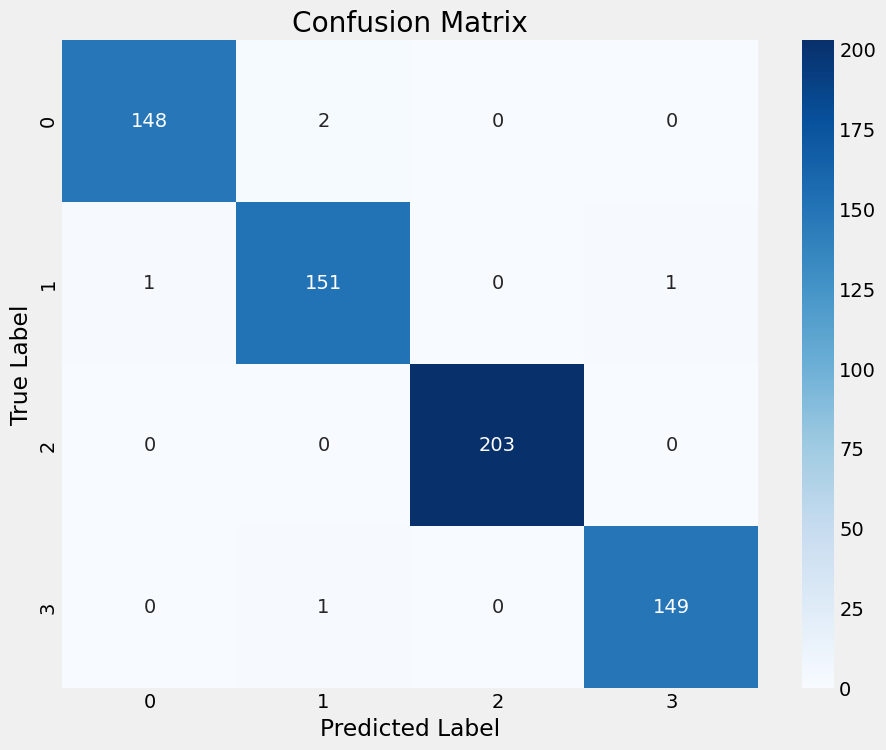

In [ ]:
preds = model.predict(ts_gen)
y_pred = np.argmax(preds, axis=1)

class_dict = {
    0: 'glioma',
    1: 'meningioma',
    2: 'notumor',
    3: 'pituitary'
}

cm = confusion_matrix(ts_gen.classes, y_pred)
labels = list(class_dict.keys())
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from PIL import Image


def predict(img_path: str) -> None:
  labels = list(class_dict.keys())

  plt.figure(figsize=(6, 8))

  img = Image.open(img_path)
  resized_img = img.resize((299, 299))
  img_array = np.asarray(resized_img)
  img_array = np.expand_dims(img_array, axis=0) / 255.0

  predictions = model.predict(img_array)
  probabilities = list(predictions[0])

  predicted_class_idx = np.argmax(probabilities)
  predicted_class = class_dict[predicted_class_idx]

  plt.subplot(2, 1, 1)
  plt.imshow(img)
  plt.title(f"Input MRI Image\nPredicted: {predicted_class}")

  plt.subplot(2, 1, 2)
  bars = plt.barh(labels, probabilities)
  plt.xlabel("Probability", fontsize=15)
  plt.title("Prediction Probabilities")

  ax = plt.gca()
  ax.bar_label(bars, fmt='%.2f')

  plt.tight_layout()
  plt.show()

  print(f"Predicted tumor type: {predicted_class}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


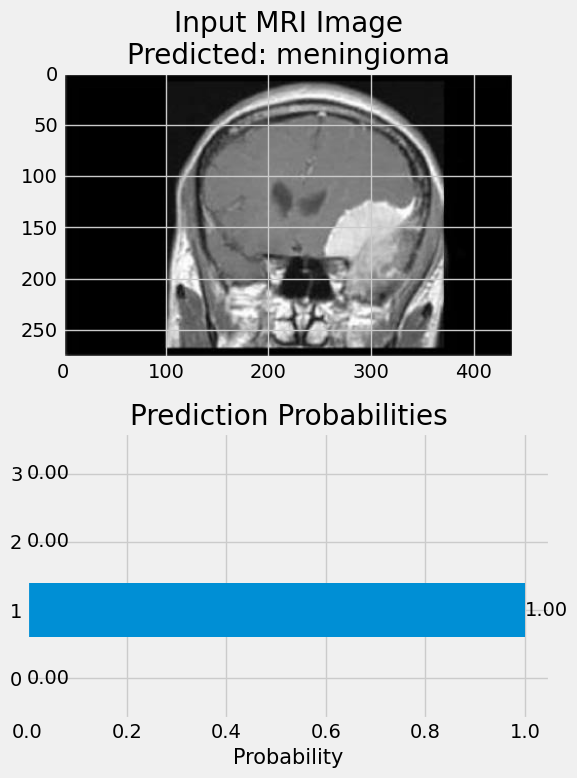

Predicted tumor type: meningioma


In [ ]:
predict("/content/Testing/meningioma/Te-meTr_0000.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


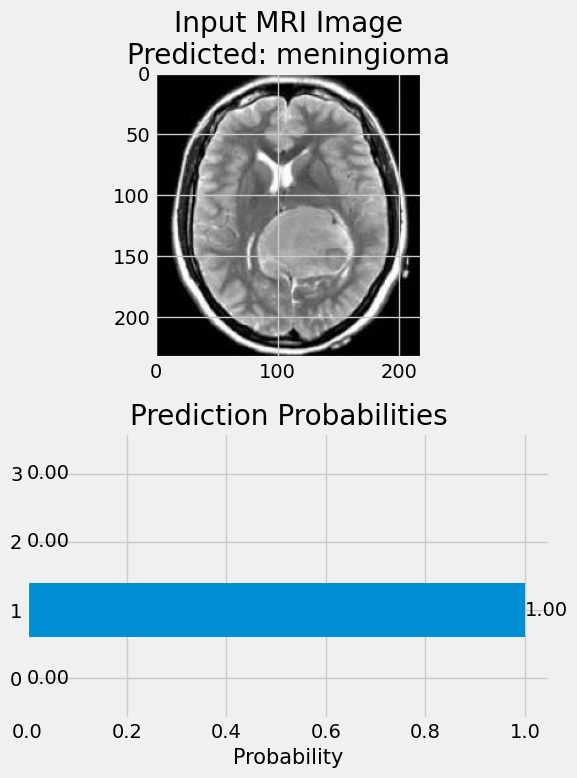

Predicted tumor type: meningioma


In [ ]:
predict("/content/Testing/meningioma/Te-meTr_0006.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


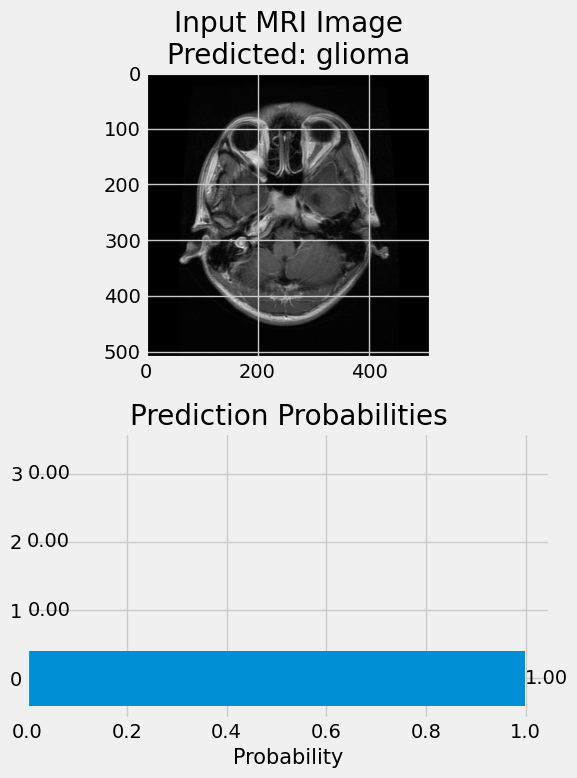

Predicted tumor type: glioma


In [ ]:
predict("/content/Testing/glioma/Te-glTr_0003.jpg")

In [ ]:
model.save_weights("xception_model.weights.h5")

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import regularizers

In [ ]:
batch_size = 16

img_size = (224, 224)

image_generator = ImageDataGenerator(rescale=1/255, brightness_range=(0.8, 1.2))

ts_gen = ImageDataGenerator(rescale=1/255)

tr_gen = image_generator.flow_from_dataframe(dataframe=tr_df, x_col='Class Path',
    y_col='Class',
    batch_size=batch_size,
    target_size=img_size
)

valid_gen = image_generator.flow_from_dataframe(dataframe=valid_df, x_col='Class Path',
    y_col='Class',
    batch_size=batch_size,
    target_size=img_size
)

ts_gen = ts_gen.flow_from_dataframe(dataframe=ts_df, x_col='Class Path',
    y_col='Class',
    batch_size=16,
    target_size=img_size,
    shuffle = False
)

Found 5712 validated image filenames belonging to 4 classes.
Found 655 validated image filenames belonging to 4 classes.
Found 656 validated image filenames belonging to 4 classes.


In [ ]:
cnn_model = Sequential()

cnn_model.add(Conv2D(512, (3, 3), padding='same', input_shape=(224,224,3), activation = 'relu'))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))

cnn_model.add(Conv2D(256, (3, 3), padding='same', activation = 'relu'))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Conv2D(128, (3, 3), padding='same', activation = 'relu'))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Conv2D(64, (3, 3), padding='same', activation = 'relu'))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Flatten())

cnn_model.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Dense(4, activation='softmax'))

cnn_model.compile(Adamax(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=[
                  'accuracy',
                  Precision(),
                  Recall()
              ])

cnn_model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 224, 224, 512)       │          14,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 112, 112, 512)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 112, 112, 256)       │       1,179,904 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 56, 56, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 56, 56, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 56, 56, 128)         │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 28, 28, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │       3,211,520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 4)                   │           1,028 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,775,620 (18.22 MB)

 Trainable params: 4,775,620 (18.22 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = cnn_model.fit(tr_gen, epochs=10, validation_data=valid_gen)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


357/357 ━━━━━━━━━━━━━━━━━━━━ 147s 339ms/step - accuracy: 0.5649 - loss: 2.3113 - precision_1: 0.6863 - recall_1: 0.3840 - val_accuracy: 0.7374 - val_loss: 0.9776 - val_precision_1: 0.7849 - val_recall_1: 0.6519
Epoch 2/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 158s 282ms/step - accuracy: 0.8033 - loss: 0.7871 - precision_1: 0.8274 - recall_1: 0.7703 - val_accuracy: 0.7908 - val_loss: 0.7278 - val_precision_1: 0.8107 - val_recall_1: 0.7649
Epoch 3/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 104s 290ms/step - accuracy: 0.8486 - loss: 0.5972 - precision_1: 0.8637 - recall_1: 0.8332 - val_accuracy: 0.8305 - val_loss: 0.6227 - val_precision_1: 0.8402 - val_recall_1: 0.8107
Epoch 4/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 106s 297ms/step - accuracy: 0.8794 - loss: 0.5002 - precision_1: 0.8881 - recall_1: 0.8682 - val_accuracy: 0.8748 - val_loss: 0.5229 - val_precision_1: 0.8805 - val_recall_1: 0.8550
Epoch 5/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 141s 295ms/step - accuracy: 0.9128 - loss: 0.3975 - precision_1: 0.9181 - recall_1:

In [ ]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'precision_1', 'recall_1', 'val_accuracy', 'val_loss', 'val_precision_1', 'val_recall_1'])

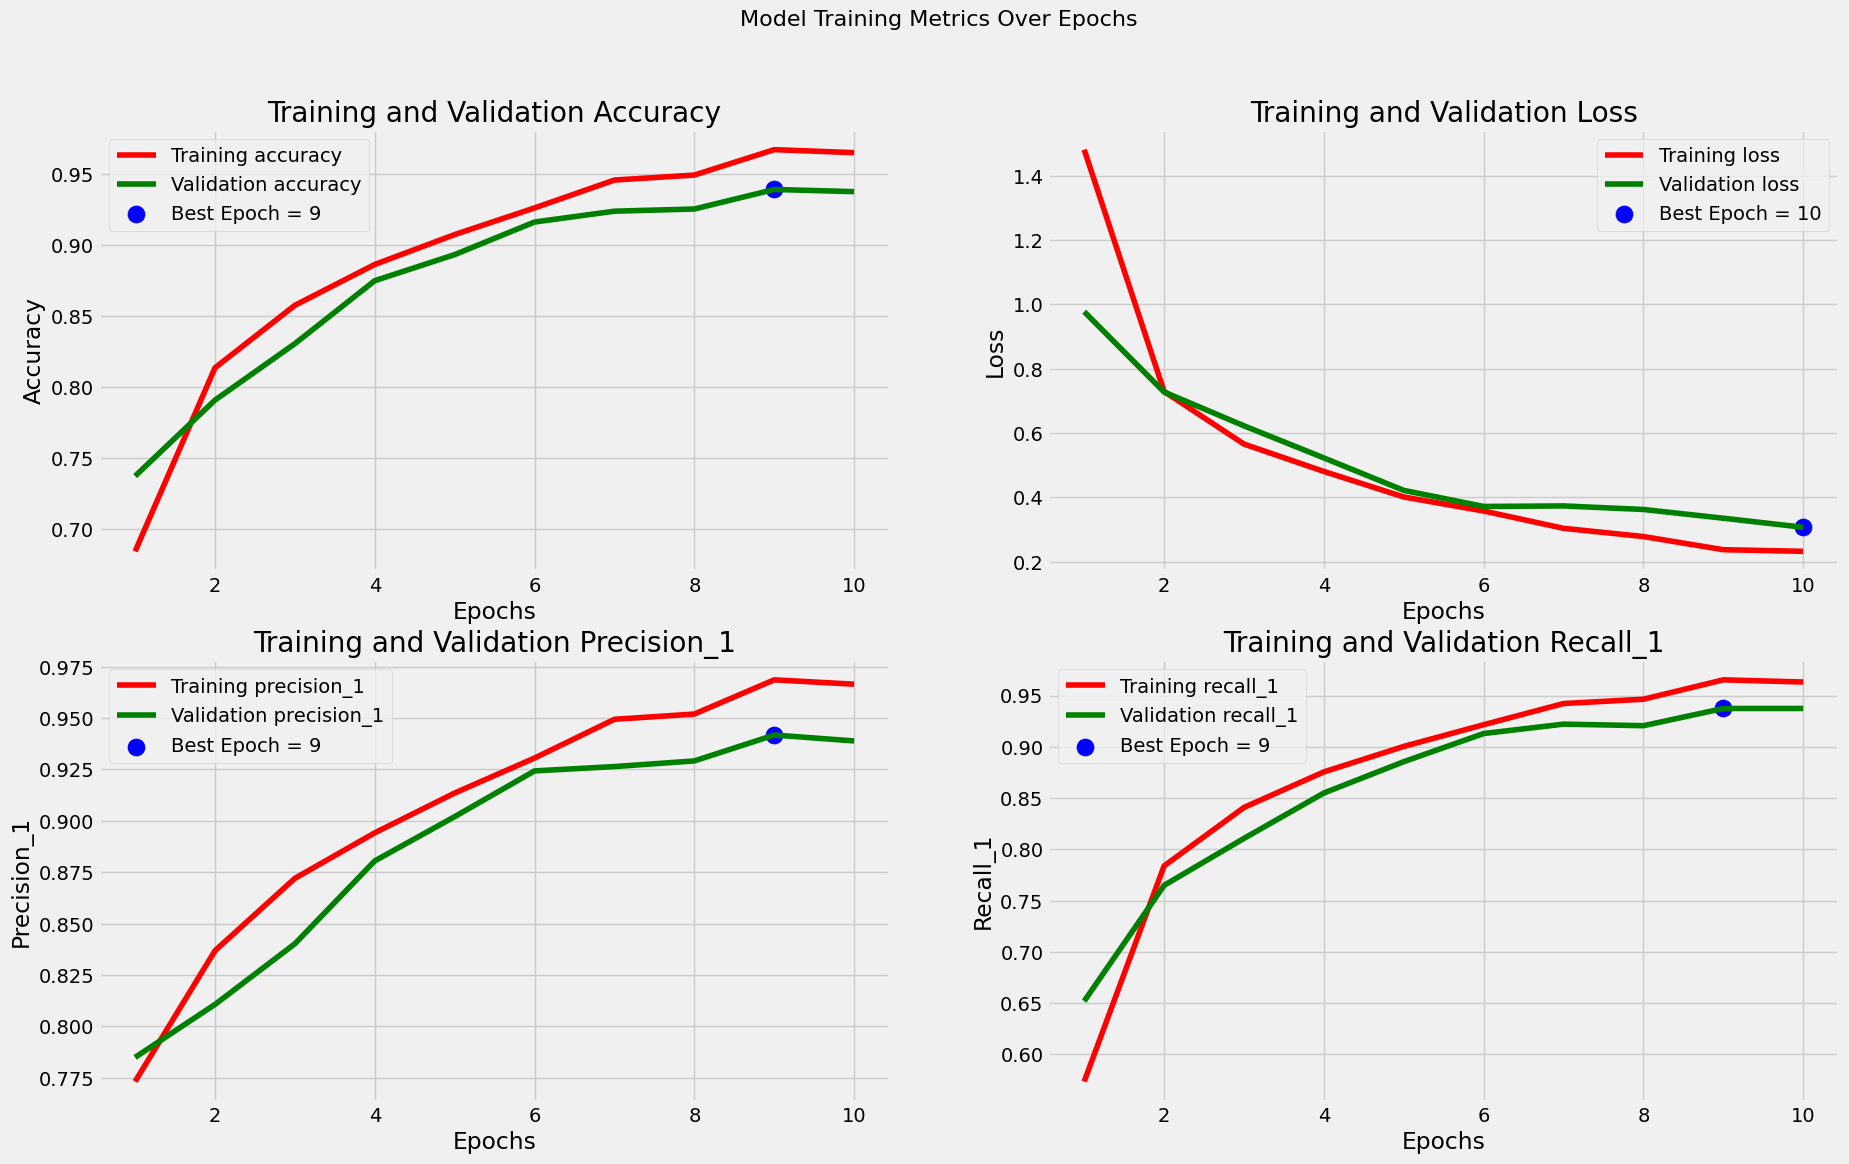

In [ ]:
metrics = ['accuracy', 'loss', 'precision_1', 'recall_1']
tr_metrics = {m: history.history[m] for m in metrics}
val_metrics = {m: history.history[f'val_{m}'] for m in metrics}

best_epoch = {}
best_values = {}

for m in metrics:
    if m == 'loss':
        idx = np.argmin(val_metrics[m])
    else:
        idx = np.argmax(val_metrics[m])

    best_epoch[m] = idx + 1
    best_values[m] = val_metrics[m][idx]

plt.figure(figsize=(20, 12))
plt.style.use('fivethirtyeight')

for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 2, i)
    epochs = range(1, len(tr_metrics[metric]) + 1)

    plt.plot(epochs, tr_metrics[metric], 'r', label=f'Training {metric}')
    plt.plot(epochs, val_metrics[metric], 'g', label=f'Validation {metric}')
    plt.scatter(best_epoch[metric], best_values[metric], s=150, c='blue', label=f'Best Epoch = {best_epoch[metric]}')

    plt.title(f'Training and Validation {metric.title()}')
    plt.xlabel('Epochs')
    plt.ylabel(metric.title())
    plt.legend()
    plt.grid(True)

plt.suptitle('Model Training Metrics Over Epochs', fontsize=16)
plt.show()

In [ ]:
train_score = cnn_model.evaluate(tr_gen, verbose=1)
valid_score = cnn_model.evaluate(valid_gen, verbose=1)
test_score = cnn_model.evaluate(ts_gen, verbose=1)

print(f"Train Accuracy: {train_score[1] * 100:.2f}%")
print(f"Train Loss: {train_score[0]:.4f}%")

print(f"\n\nValidation Accuracy: {valid_score[1] * 100:.2f}%")
print(f"Validation Loss: {valid_score[0]:.4f}%")

print(f"\n\nTest Accuracy: {test_score[1] * 100:.2f}%")
print(f"Test Loss: {test_score[0]:.4f}%")

357/357 ━━━━━━━━━━━━━━━━━━━━ 26s 74ms/step - accuracy: 0.9860 - loss: 0.1860 - precision_1: 0.9860 - recall_1: 0.9852
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 69ms/step - accuracy: 0.9540 - loss: 0.2840 - precision_1: 0.9562 - recall_1: 0.9530
 2/41 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - accuracy: 0.9062 - loss: 0.2692 - precision_1: 0.9505 - recall_1: 0.9062 

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - accuracy: 0.9513 - loss: 0.2372 - precision_1: 0.9576 - recall_1: 0.9487
Train Accuracy: 98.55%
Train Loss: 0.1870%


Validation Accuracy: 94.50%
Validation Loss: 0.3052%


Test Accuracy: 95.73%
Test Loss: 0.2418%


41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step


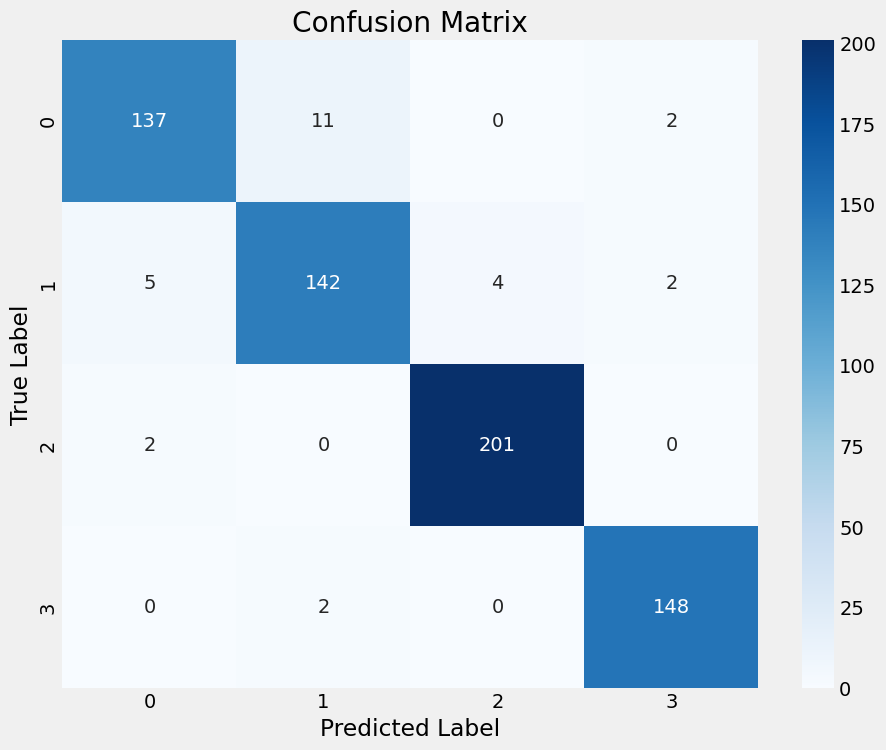

In [ ]:
preds = cnn_model.predict(ts_gen)
y_pred = np.argmax(preds, axis=1)

class_dict = {
    0: 'glioma',
    1: 'meningioma',
    2: 'notumor',
    3: 'pituitary'
}

cm = confusion_matrix(ts_gen.classes, y_pred)
labels = list(class_dict.keys())
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
clr = classification_report(ts_gen.classes, y_pred)
print(clr)

              precision    recall  f1-score   support

           0       0.95      0.91      0.93       150
           1       0.92      0.93      0.92       153
           2       0.98      0.99      0.99       203
           3       0.97      0.99      0.98       150

    accuracy                           0.96       656
   macro avg       0.96      0.95      0.95       656
weighted avg       0.96      0.96      0.96       656



In [ ]:
cnn_model.save("cnn_model.h5")